In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
#checking the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [4]:
#checking for null values
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [5]:
#Now Check any duplicate data present or not, If present then we will drop them.
df=df.drop_duplicates()

In [6]:
df.shape


(6762, 23)

In [7]:
df['Evaporation'].value_counts()

4.0      141
3.0      125
2.2      118
2.4      116
2.6      116
        ... 
145.0      1
33.8       1
59.2       1
20.8       1
0.7        1
Name: Evaporation, Length: 116, dtype: int64

In [8]:
df['Evaporation'].isnull().sum()

2921

In [9]:
df['Evaporation'].nunique()

116

In [10]:
df['Sunshine'].isnull().sum()

3236

In [11]:
# Statistical description of our data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6692.000000,6705.000000,6624.000000,3841.000000,3526.000000,5820.000000,6699.000000,6662.000000,6708.000000,6666.000000,5454.000000,5451.000000,4896.000000,4860.000000,6711.000000,6670.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561
std,5.569574,6.156128,10.591418,4.436790,3.785883,14.418577,9.833499,9.620043,17.251733,18.631086,6.712043,6.646755,2.908324,2.740519,5.744117,6.012896
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.000000,19.500000,0.000000,2.600000,5.400000,30.000000,6.000000,9.000000,56.000000,38.000000,1013.100000,1010.300000,1.000000,1.000000,13.800000,18.300000
50%,13.200000,23.500000,0.000000,4.600000,9.000000,37.000000,11.000000,17.000000,68.000000,50.000000,1017.600000,1015.100000,5.000000,5.000000,18.000000,22.100000
75%,17.500000,28.400000,0.800000,7.000000,10.800000,48.000000,19.000000,24.000000,81.000000,63.000000,1022.200000,1019.600000,7.000000,7.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


There are missing values present

In [12]:
#Now We will convert date from object type to date type and then seperate day, month and year
df['Date']=pd.to_datetime(df['Date'])
df["Day"] = df['Date'].dt.day
df["Month"] = df['Date'].dt.month
df["Year"] = df['Date'].dt.year

In [13]:
# Now drop date coloumns from our data
df.drop("Date",axis=1,inplace=True)

In [14]:
#As we removed around 1663 records let us check again null value sum
df.isnull().sum()

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Day                 0
Month               0
Year                0
dtype: int64

In [15]:
# grouping categorical columns
cat = [x for x in df.columns if df[x].dtypes=='O']
# grouping numerical columns
num = [y for y in df.columns if df[y].dtypes!='O']

In [16]:
cat

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [17]:
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Day',
 'Month',
 'Year']

In [18]:
# Now let us replace the NAN values in Other catagorical Coloumns by MODE 

df1=pd.DataFrame()
df1['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df1['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df1['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df1['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df1['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [19]:
#Now impute values to other fields using this feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [20]:
# We can impute values to our numerical columns by using Iterative imputers
itimp=IterativeImputer()
imp=pd.DataFrame(df[num])

In [21]:
df2=pd.DataFrame(itimp.fit_transform(imp),columns=num)
df2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
0,13.4,22.900000,0.6,3.391685,7.130509,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.874826,16.9,21.8,1.0,12.0,2008.0
1,7.4,25.100000,0.0,4.149341,12.628322,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,1.135447,1.451345,17.2,24.3,2.0,12.0,2008.0
2,12.9,25.700000,0.0,5.872974,12.022633,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,2.268447,2.000000,21.0,23.2,3.0,12.0,2008.0
3,9.2,28.000000,0.0,3.771469,13.091641,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,0.505052,0.825362,18.1,26.5,4.0,12.0,2008.0
4,17.5,32.300000,1.0,3.909425,6.732299,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,5.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,2.8,23.400000,0.0,6.351080,11.113943,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,0.685550,1.589567,10.1,22.4,21.0,6.0,2017.0
6758,3.6,25.300000,0.0,6.025810,11.780452,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,0.577039,1.130006,10.9,24.5,22.0,6.0,2017.0
6759,5.4,26.900000,0.0,7.826086,11.551481,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,0.869720,1.639326,12.5,26.1,23.0,6.0,2017.0
6760,7.8,27.000000,0.0,8.048489,10.572988,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,24.0,6.0,2017.0


In [22]:
df[num]=df2[num]


In [23]:
df.shape

(6762, 25)

In [24]:
df.isna().sum()


Location            0
MinTemp          1663
MaxTemp          1663
Rainfall         1663
Evaporation      1663
Sunshine         1663
WindGustDir       942
WindGustSpeed    1663
WindDir9am        794
WindDir3pm        294
WindSpeed9am     1663
WindSpeed3pm     1663
Humidity9am      1663
Humidity3pm      1663
Pressure9am      1663
Pressure3pm      1663
Cloud9am         1663
Cloud3pm         1663
Temp9am          1663
Temp3pm          1663
RainToday         138
RainTomorrow      138
Day              1663
Month            1663
Year             1663
dtype: int64

In [25]:
df.dropna(inplace=True)
df.shape

(3664, 25)

In [26]:
cat

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.900000,0.6,3.391685,7.130509,13.0,44.000000,13.0,14.0,...,1007.1,8.000000,4.874826,16.9,21.8,0.0,0.0,1.0,12.0,2008.0
1,1.0,7.4,25.100000,0.0,4.149341,12.628322,14.0,44.000000,6.0,15.0,...,1007.8,1.135447,1.451345,17.2,24.3,0.0,0.0,2.0,12.0,2008.0
2,1.0,12.9,25.700000,0.0,5.872974,12.022633,15.0,46.000000,13.0,15.0,...,1008.7,2.268447,2.000000,21.0,23.2,0.0,0.0,3.0,12.0,2008.0
3,1.0,9.2,28.000000,0.0,3.771469,13.091641,4.0,24.000000,9.0,0.0,...,1012.8,0.505052,0.825362,18.1,26.5,0.0,0.0,4.0,12.0,2008.0
4,1.0,17.5,32.300000,1.0,3.909425,6.732299,13.0,41.000000,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,0.0,2.8,23.400000,0.0,6.351080,11.113943,3.0,31.000000,3.0,3.0,...,1020.3,0.685550,1.589567,10.1,22.4,0.0,0.0,21.0,6.0,2017.0
6758,0.0,3.6,25.300000,0.0,6.025810,11.780452,14.0,22.000000,5.0,3.0,...,1019.1,0.577039,1.130006,10.9,24.5,0.0,1.0,22.0,6.0,2017.0
6759,0.0,5.4,26.900000,0.0,7.826086,11.551481,15.0,37.000000,11.0,12.0,...,1016.8,0.869720,1.639326,12.5,26.1,1.0,1.0,23.0,6.0,2017.0
6760,0.0,7.8,27.000000,0.0,8.048489,10.572988,15.0,28.000000,8.0,13.0,...,1016.5,3.000000,2.000000,15.1,26.0,1.0,0.0,24.0,6.0,2017.0


In [29]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
count,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,...,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000
mean,3.507915,13.714256,24.609522,3.020905,5.119295,7.695830,8.024563,37.578620,8.554858,7.429312,...,1014.837630,4.133056,4.088403,18.702402,23.202842,0.266648,0.263919,15.764192,6.370633,2011.995633
std,1.896141,5.651881,6.107342,10.392979,3.698136,3.627223,4.559785,13.692429,4.465874,4.524924,...,6.146728,2.621892,2.527915,5.612684,5.954968,0.442267,0.440816,8.760661,3.369123,2.590852
min,0.000000,-1.300000,8.200000,-4.110145,-4.734647,-1.178066,0.000000,9.000000,0.000000,0.000000,...,982.900000,-1.131283,-3.591006,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,2.000000,9.500000,20.100000,0.000000,2.911303,5.100000,4.000000,28.000000,5.000000,3.000000,...,1010.500000,1.955254,2.000000,14.800000,19.000000,0.000000,0.000000,8.000000,4.000000,2010.000000
50%,3.000000,13.900000,24.200000,0.000000,4.800000,8.270288,8.000000,35.000000,9.000000,8.000000,...,1015.100000,4.000000,4.000000,18.900000,22.700000,0.000000,0.000000,16.000000,6.000000,2012.000000
75%,5.000000,18.100000,28.900000,1.000000,6.915479,10.455116,12.000000,46.000000,12.000000,11.000000,...,1018.800000,7.000000,6.357341,22.900000,27.200000,1.000000,1.000000,23.000000,9.000000,2014.000000
max,7.000000,28.500000,45.500000,225.000000,59.200000,19.032238,15.000000,107.000000,15.000000,15.000000,...,1035.900000,8.666920,9.952668,39.400000,44.100000,1.000000,1.000000,31.000000,12.000000,2017.000000


<AxesSubplot:>

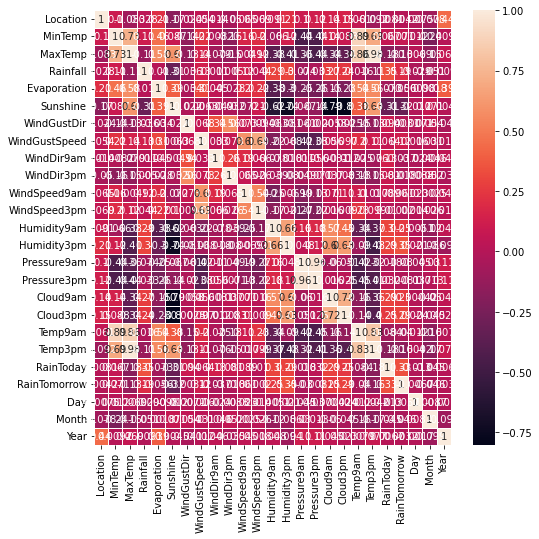

In [30]:
#using heatmap to display the data
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, linewidth=1)

<AxesSubplot:xlabel='Location', ylabel='count'>

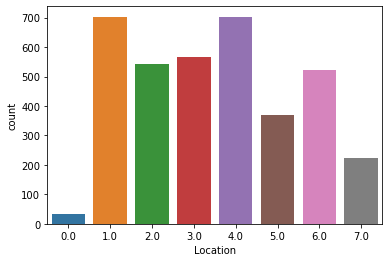

In [31]:
sns.countplot(x='Location',data=df)

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

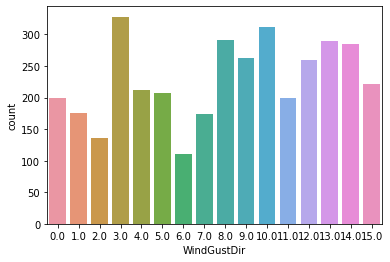

In [32]:
sns.countplot(x='WindGustDir',data=df)

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

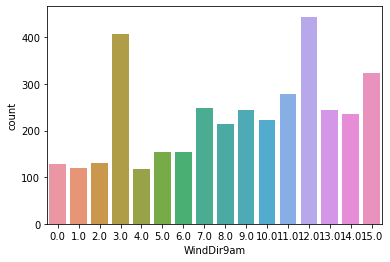

In [33]:
sns.countplot(x='WindDir9am',data=df)

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

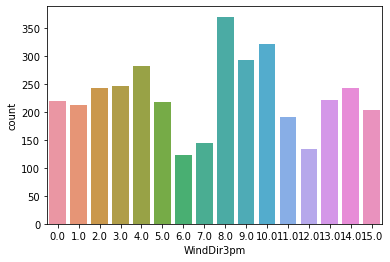

In [34]:
sns.countplot(x='WindDir3pm',data=df)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='count'>

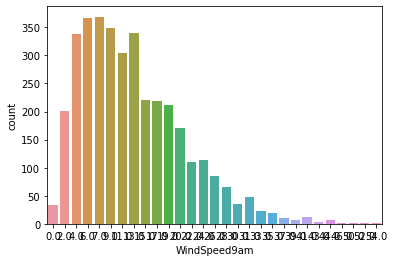

In [35]:
sns.countplot(x='WindSpeed9am',data=df)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

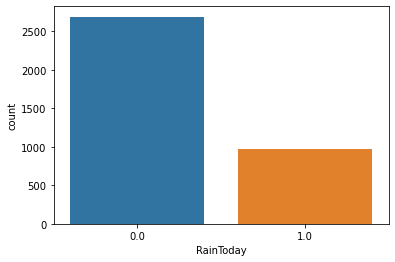

In [36]:
sns.countplot(x='RainToday',data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

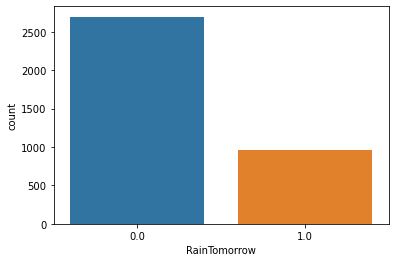

In [37]:
sns.countplot(x='RainTomorrow',data=df)

<AxesSubplot:xlabel='Day', ylabel='count'>

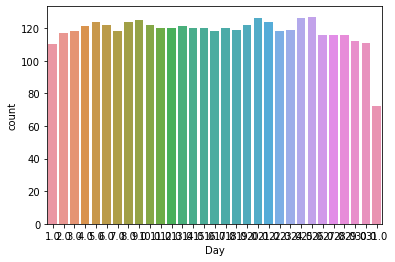

In [38]:
sns.countplot(x='Day',data=df)

<AxesSubplot:xlabel='Month', ylabel='count'>

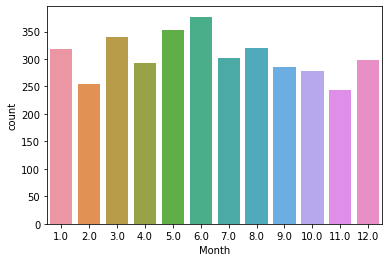

In [39]:
sns.countplot(x='Month',data=df)

<AxesSubplot:xlabel='Year', ylabel='count'>

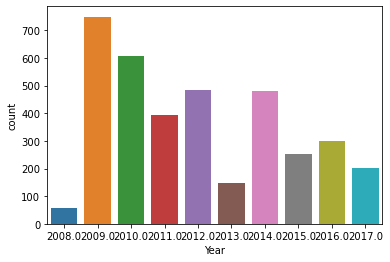

In [40]:
sns.countplot(x='Year',data=df)

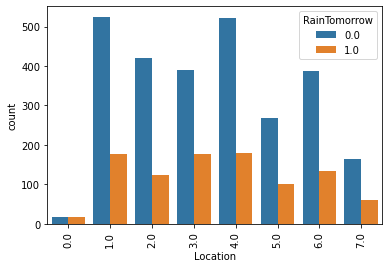

In [41]:
sns.countplot(df['Location'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

3.0     328
10.0    312
8.0     291
13.0    289
14.0    285
9.0     262
12.0    260
15.0    222
4.0     212
5.0     207
11.0    200
0.0     199
1.0     176
7.0     174
2.0     136
6.0     111
Name: WindGustDir, dtype: int64


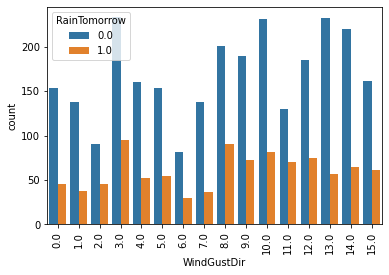

In [42]:
print(df['WindGustDir'].value_counts())
sns.countplot(df['WindGustDir'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

12.0    444
3.0     408
15.0    323
11.0    278
7.0     249
13.0    245
9.0     244
14.0    235
10.0    223
8.0     214
6.0     153
5.0     153
2.0     130
0.0     128
1.0     119
4.0     118
Name: WindDir9am, dtype: int64


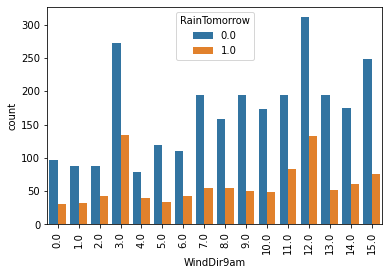

In [43]:
print(df['WindDir9am'].value_counts())
sns.countplot(df['WindDir9am'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

8.0     370
10.0    322
9.0     292
4.0     282
3.0     247
2.0     243
14.0    242
13.0    221
0.0     220
5.0     217
1.0     213
15.0    204
11.0    190
7.0     145
12.0    133
6.0     123
Name: WindDir3pm, dtype: int64


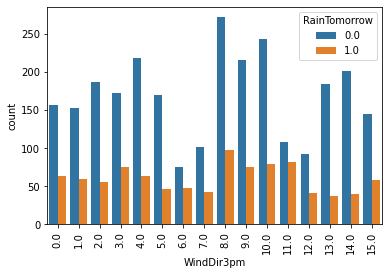

In [44]:
print(df['WindDir3pm'].value_counts())
sns.countplot(df['WindDir3pm'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)
plt.show()

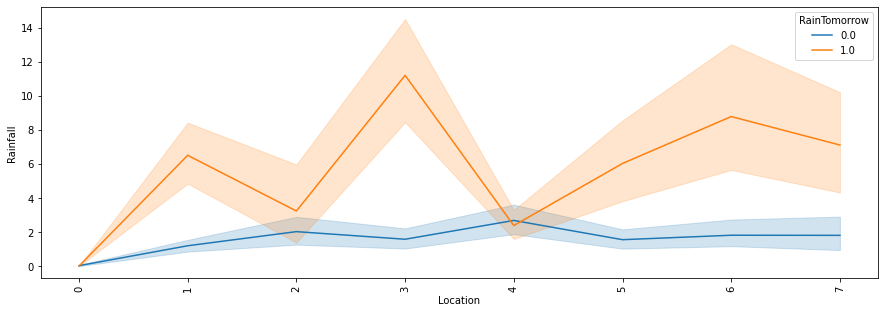

In [45]:
#Let us find the fainfall at different location
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.lineplot(df['Location'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

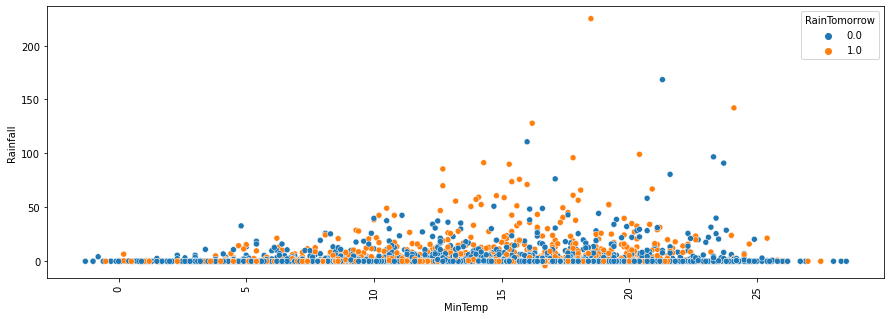

In [46]:
#Let us find the fainfall at minimum Temperature
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['MinTemp'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

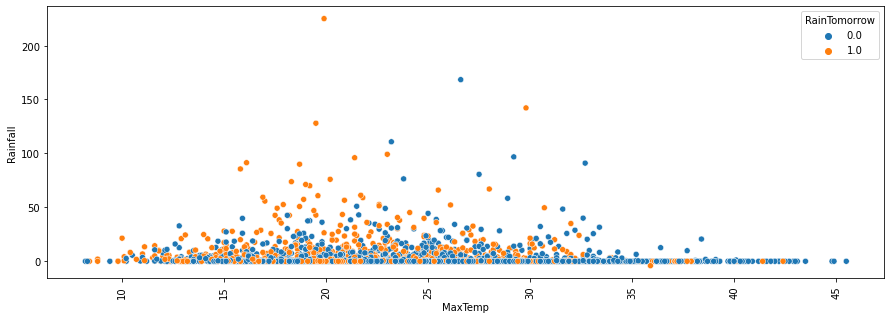

In [47]:
#Let us find the rainfall at Max Temperature
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['MaxTemp'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

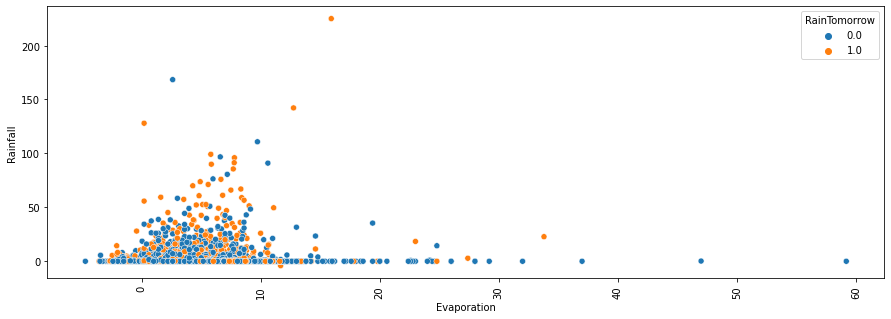

In [48]:
#Let us find the rainfall at Evaporation
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['Evaporation'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()


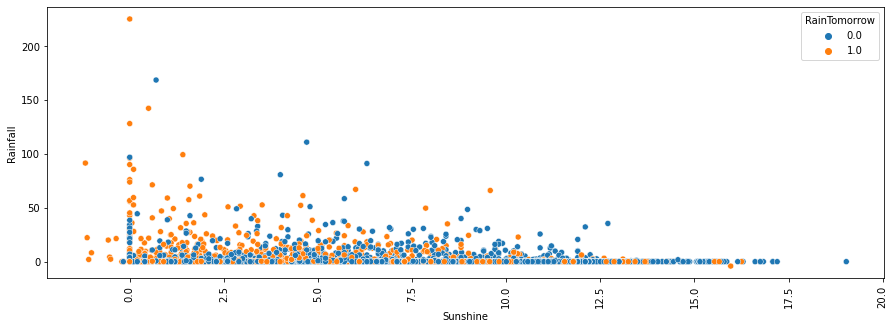

In [49]:
#Let us find the rainfall at Sunshine
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['Sunshine'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

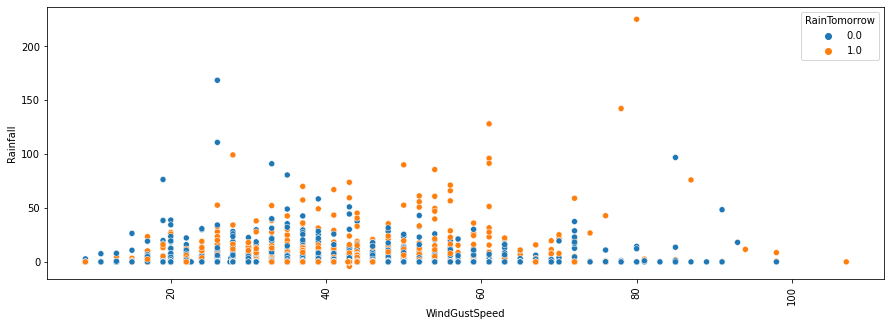

In [50]:
#Let us find the rainfall at WindGustSpeed
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['WindGustSpeed'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

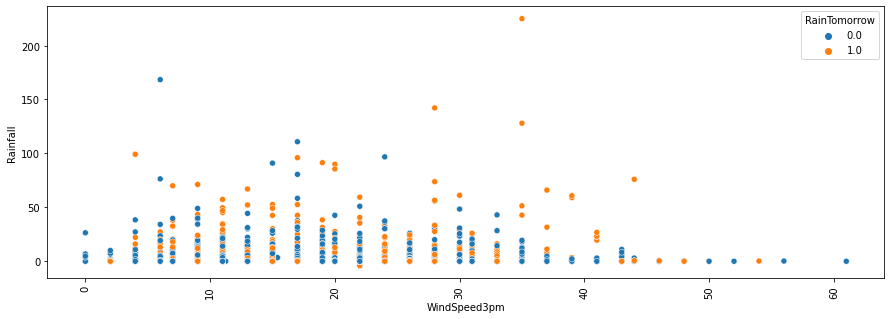

In [51]:
#Let us find the rainfall at Windspeed3pm
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['WindSpeed3pm'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

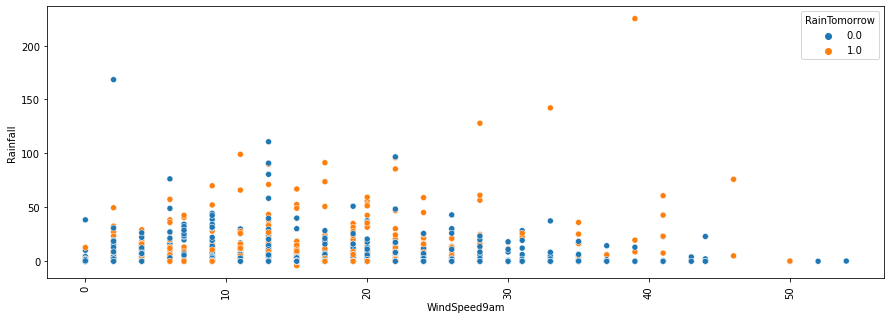

In [52]:
#Let us find the rainfall at WindSpeed9am
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['WindSpeed9am'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

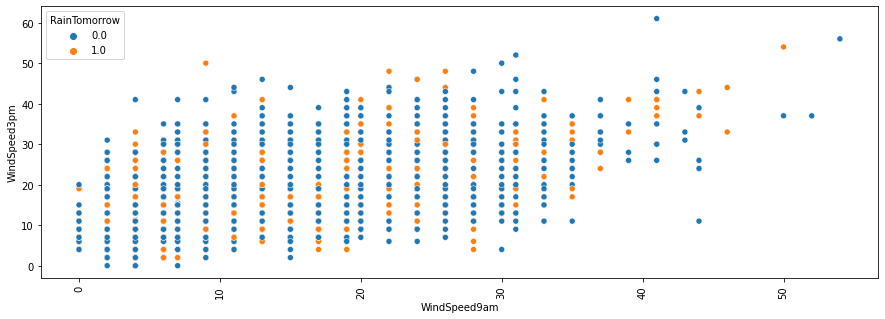

In [53]:
#Check is there any relation between windspeed9am with windspeed3pm
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['WindSpeed9am'],df['WindSpeed3pm'],hue=df['RainTomorrow'])
plt.show()

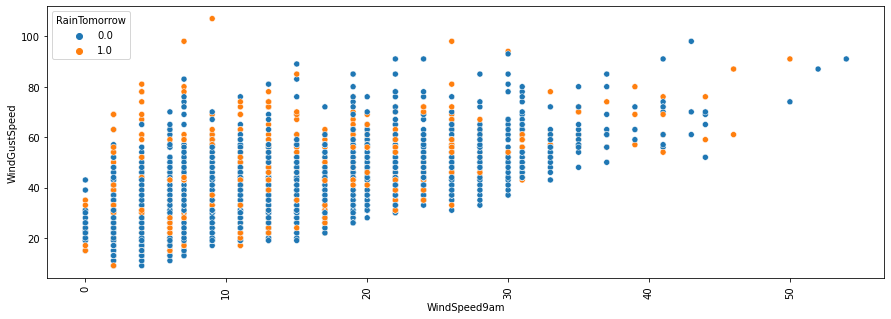

In [54]:
#Let us find the Windgustspeed at WindSpeed9am
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.scatterplot(df['WindSpeed9am'],df['WindGustSpeed'],hue=df['RainTomorrow'])
plt.show()

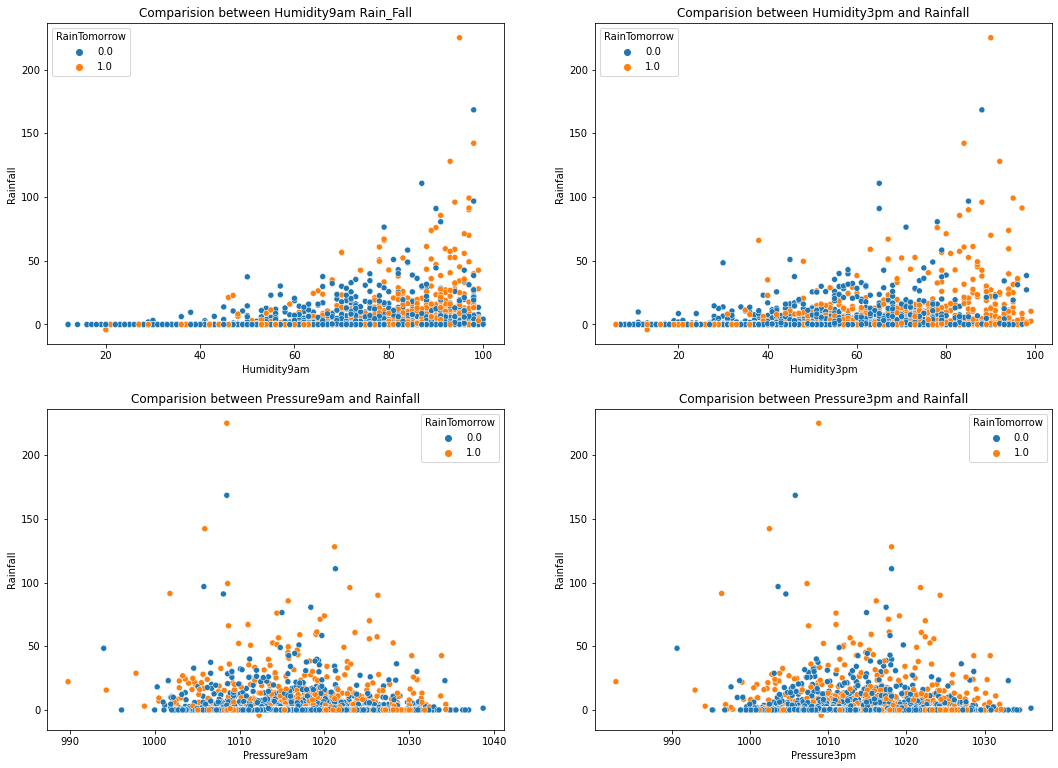

In [55]:
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between Humidity9am Rain_Fall')
sns.scatterplot(df['Humidity9am'],df['Rainfall'],hue=df['RainTomorrow'])

plt.subplot(2,2,2)
plt.title('Comparision between Humidity3pm and Rainfall')
sns.scatterplot(df['Humidity3pm'],df['Rainfall'],hue=df['RainTomorrow'])

plt.subplot(2,2,3)
plt.title('Comparision between Pressure9am and Rainfall')
sns.scatterplot(df['Pressure9am'],df['Rainfall'],hue=df['RainTomorrow'])

plt.subplot(2,2,4)
plt.title('Comparision between Pressure3pm and Rainfall')
sns.scatterplot(df['Pressure3pm'],df['Rainfall'],hue=df['RainTomorrow'])
plt.show()

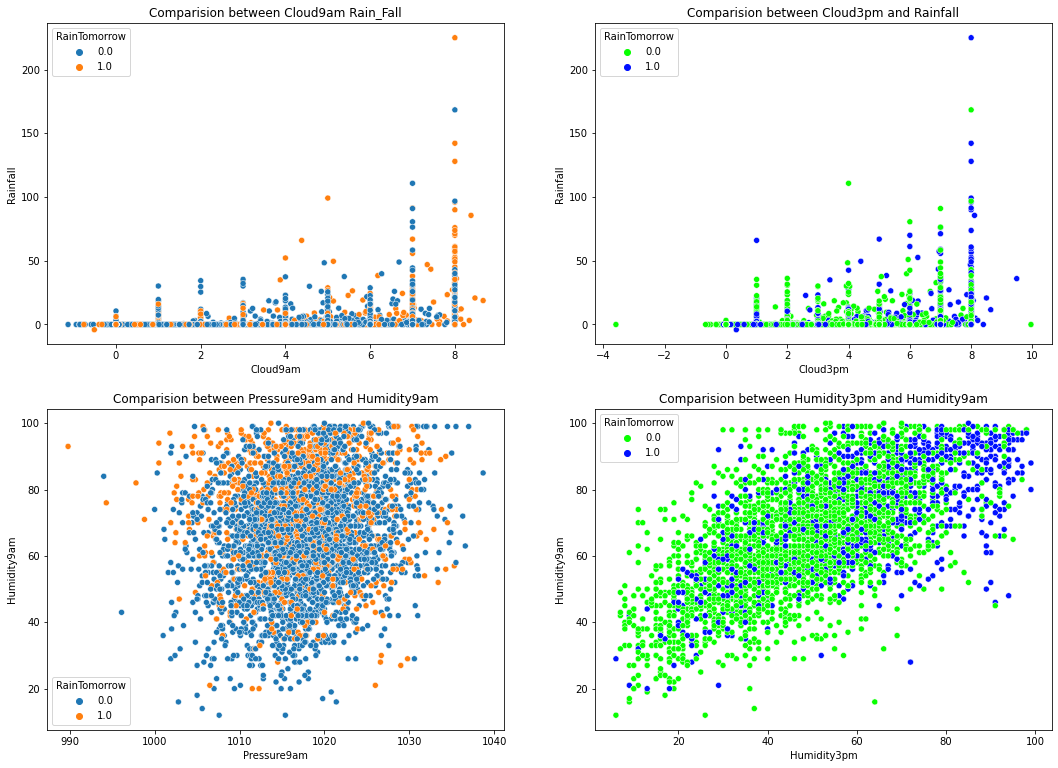

In [56]:
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between Cloud9am Rain_Fall')
sns.scatterplot(df['Cloud9am'],df['Rainfall'],hue=df['RainTomorrow'])

plt.subplot(2,2,2)
plt.title('Comparision between Cloud3pm and Rainfall')
sns.scatterplot(df['Cloud3pm'],df['Rainfall'],hue=df['RainTomorrow'],palette='hsv')

plt.subplot(2,2,3)
plt.title('Comparision between Pressure9am and Humidity9am')
sns.scatterplot(df['Pressure9am'],df['Humidity9am'],hue=df['RainTomorrow'])

plt.subplot(2,2,4)
plt.title('Comparision between Humidity3pm and Humidity9am')
sns.scatterplot(df['Humidity3pm'],df['Humidity9am'],hue=df['RainTomorrow'],palette='hsv')
plt.show()

In [57]:
df.corr()['Rainfall'].sort_values()


Sunshine        -0.309761
Temp3pm         -0.109519
MaxTemp         -0.106513
Pressure9am     -0.074311
Month           -0.051424
WindGustDir     -0.035649
Pressure3pm     -0.032819
Day             -0.028820
Temp9am         -0.015766
Year            -0.009080
WindDir3pm       0.004979
Evaporation      0.010121
WindDir9am       0.011366
Location         0.027905
WindSpeed3pm     0.043516
MinTemp          0.107436
WindSpeed9am     0.116001
WindGustSpeed    0.130615
RainTomorrow     0.193041
Cloud3pm         0.240178
Cloud9am         0.269424
Humidity9am      0.288903
Humidity3pm      0.297236
RainToday        0.351558
Rainfall         1.000000
Name: Rainfall, dtype: float64

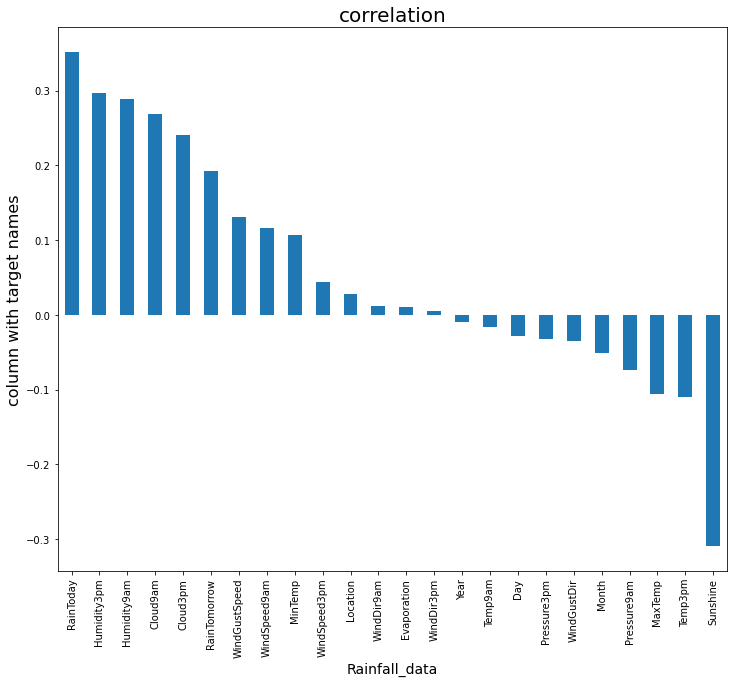

In [58]:
#checking correlation
plt.figure(figsize=(12,10))
df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar')
plt.xlabel('Rainfall_data',fontsize=14)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=20)
plt.show()

In [59]:
df.corr()['RainTomorrow'].sort_values()


Sunshine        -0.323539
Temp3pm         -0.155628
MaxTemp         -0.129383
Evaporation     -0.055856
Month           -0.046029
Temp9am         -0.039935
WindDir9am      -0.037241
Pressure9am     -0.029676
WindDir3pm      -0.018223
Pressure3pm     -0.008112
Day             -0.005653
WindGustDir     -0.003090
WindSpeed3pm     0.002022
Year             0.003161
Location         0.004196
WindSpeed9am     0.060629
MinTemp          0.070538
WindGustSpeed    0.117339
Rainfall         0.193041
Humidity9am      0.247628
Cloud9am         0.254618
Cloud3pm         0.289495
RainToday        0.333482
Humidity3pm      0.351195
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

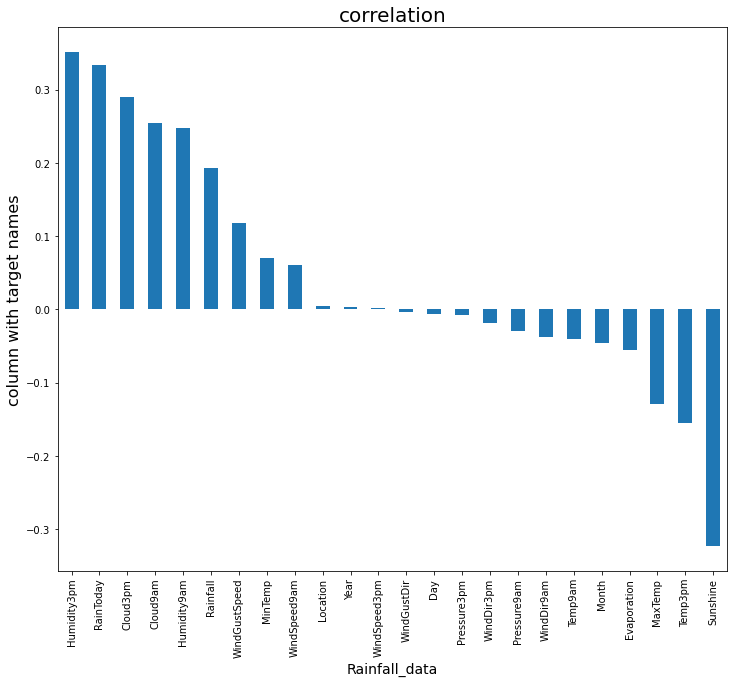

In [60]:
plt.figure(figsize=(12,10))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel('Rainfall_data',fontsize=14)
plt.ylabel('column with target names',fontsize=16)
plt.title('correlation',fontsize=20)
plt.show()

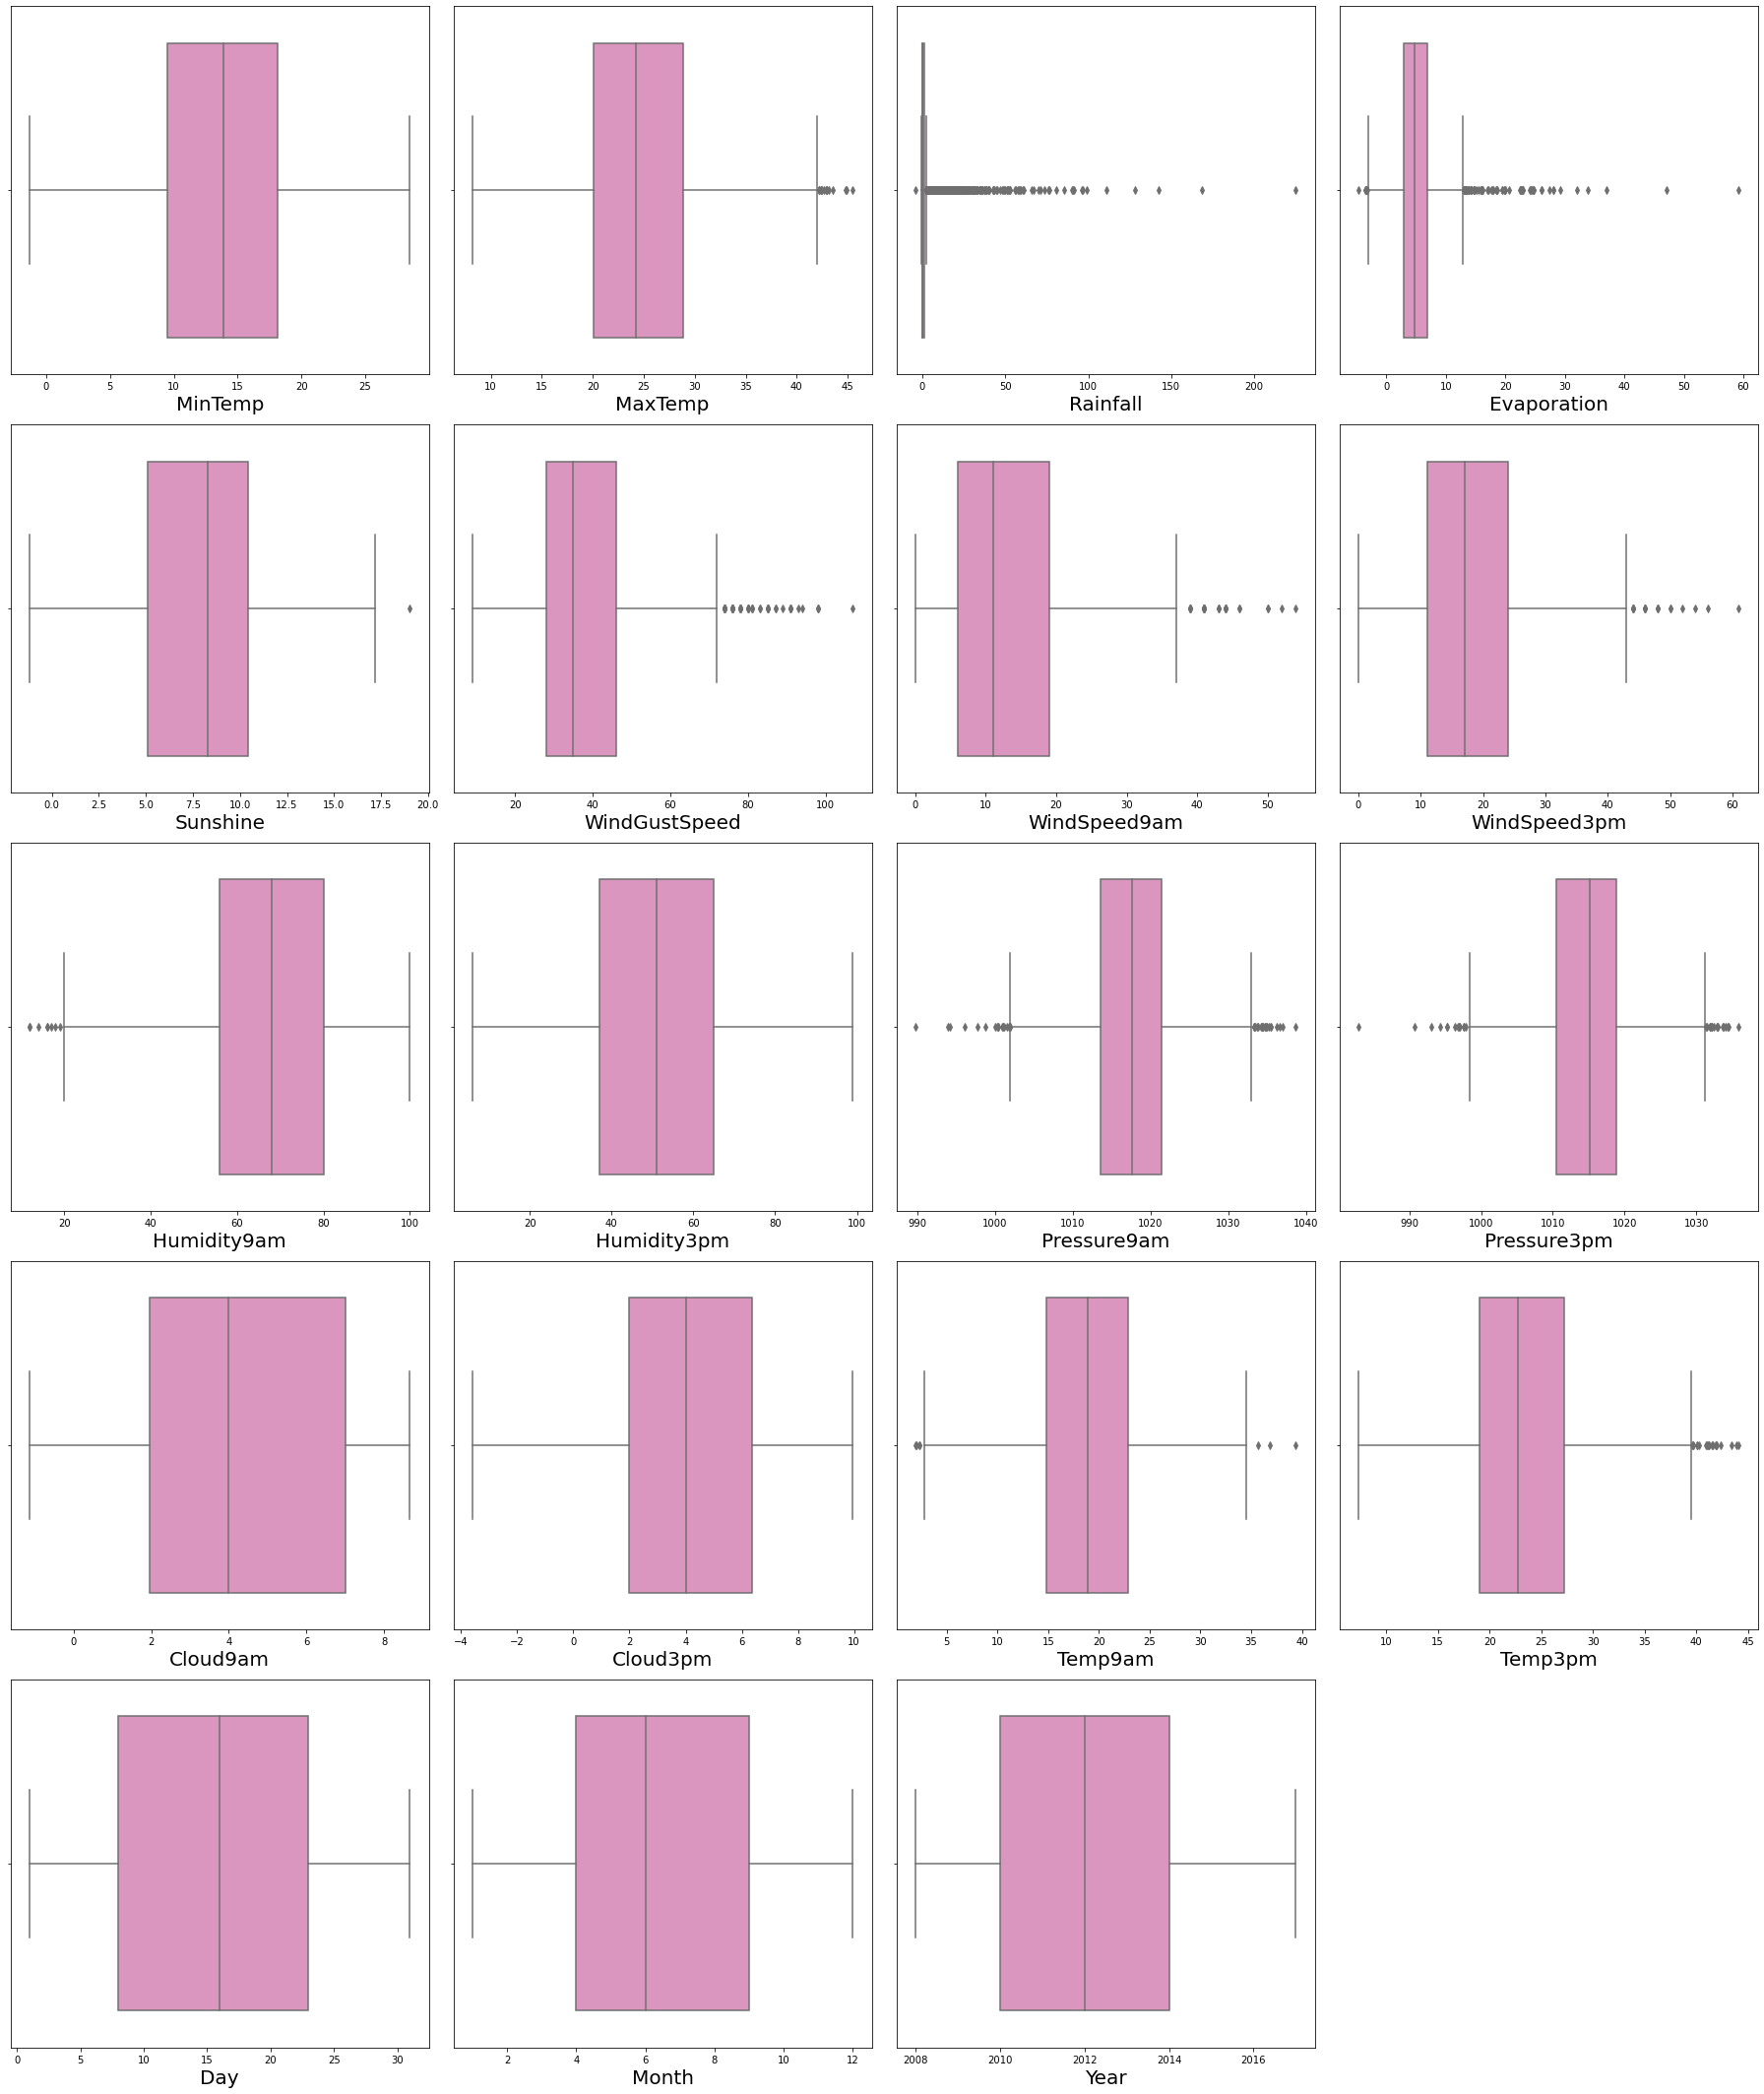

In [61]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in num:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [62]:
features=df[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z  

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.279951,0.232968,0.467221,0.155876,0.469037,0.878982,0.747331,0.223297,1.593480,1.258993,0.321174,0.235607
1,0.080320,0.290707,0.262317,1.360039,0.469037,1.069053,0.518003,1.363194,1.121110,1.145095,0.267716,0.184268
2,0.178576,0.290707,0.203828,1.193032,0.615123,0.757229,0.976660,1.715748,1.609768,0.998656,0.409414,0.000477
3,0.555224,0.290707,0.364511,1.487791,0.991824,0.216788,0.972632,1.304435,0.019094,0.331544,0.107343,0.553757
4,1.259390,0.194476,0.327201,0.265675,0.249908,0.703797,0.288674,0.869645,1.088532,1.437974,0.160801,1.091197
...,...,...,...,...,...,...,...,...,...,...,...,...
6757,0.198071,0.290707,0.333128,0.942479,0.480522,0.026716,0.743304,0.951882,1.159298,0.888784,1.532881,0.134837
6758,0.113072,0.290707,0.245161,1.126256,1.137910,0.026716,0.972632,0.658087,0.980123,0.693532,1.390327,0.217858
6759,0.375088,0.290707,0.732034,1.063121,0.042264,0.460292,0.972632,0.834364,0.572907,0.319298,1.105220,0.486577
6760,0.391464,0.290707,0.792181,0.793321,0.699651,0.026716,1.201961,0.951882,0.312289,0.270485,0.641920,0.469782


In [63]:
# Creating new dataframe
newdf = df[(z<3).all(axis=1)] 
newdf

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1.0,13.4,22.900000,0.6,3.391685,7.130509,13.0,44.000000,13.0,14.0,...,1007.1,8.000000,4.874826,16.9,21.8,0.0,0.0,1.0,12.0,2008.0
1,1.0,7.4,25.100000,0.0,4.149341,12.628322,14.0,44.000000,6.0,15.0,...,1007.8,1.135447,1.451345,17.2,24.3,0.0,0.0,2.0,12.0,2008.0
2,1.0,12.9,25.700000,0.0,5.872974,12.022633,15.0,46.000000,13.0,15.0,...,1008.7,2.268447,2.000000,21.0,23.2,0.0,0.0,3.0,12.0,2008.0
3,1.0,9.2,28.000000,0.0,3.771469,13.091641,4.0,24.000000,9.0,0.0,...,1012.8,0.505052,0.825362,18.1,26.5,0.0,0.0,4.0,12.0,2008.0
4,1.0,17.5,32.300000,1.0,3.909425,6.732299,13.0,41.000000,1.0,7.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,5.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,0.0,2.8,23.400000,0.0,6.351080,11.113943,3.0,31.000000,3.0,3.0,...,1020.3,0.685550,1.589567,10.1,22.4,0.0,0.0,21.0,6.0,2017.0
6758,0.0,3.6,25.300000,0.0,6.025810,11.780452,14.0,22.000000,5.0,3.0,...,1019.1,0.577039,1.130006,10.9,24.5,0.0,1.0,22.0,6.0,2017.0
6759,0.0,5.4,26.900000,0.0,7.826086,11.551481,15.0,37.000000,11.0,12.0,...,1016.8,0.869720,1.639326,12.5,26.1,1.0,1.0,23.0,6.0,2017.0
6760,0.0,7.8,27.000000,0.0,8.048489,10.572988,15.0,28.000000,8.0,13.0,...,1016.5,3.000000,2.000000,15.1,26.0,1.0,0.0,24.0,6.0,2017.0


In [64]:
print("Data Loss Percentage: ", ((df.shape[0]-newdf.shape[0])/df.shape[0]*100))

Data Loss Percentage:  5.29475982532751


In [65]:
newdf.skew()

Location         0.204430
MinTemp         -0.141119
MaxTemp          0.156145
Rainfall         3.486417
Evaporation      0.273112
Sunshine        -0.367251
WindGustDir     -0.173138
WindGustSpeed    0.612826
WindDir9am      -0.282338
WindDir3pm       0.014431
WindSpeed9am     0.755294
WindSpeed3pm     0.480145
Humidity9am     -0.196702
Humidity3pm      0.099961
Pressure9am     -0.018370
Pressure3pm      0.014641
Cloud9am         0.063005
Cloud3pm         0.131755
Temp9am         -0.201889
Temp3pm          0.204870
RainToday        1.122697
RainTomorrow     1.112299
Day              0.001710
Month            0.056269
Year             0.438072
dtype: float64

In [66]:
skew=['Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

newdf[skew] = scaler.fit_transform(newdf[skew].values)
newdf[skew].head()

,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm
0,0.143054,-0.466315,0.671798,1.029367,0.870971
1,-0.495999,-0.207177,0.671798,-1.222782,0.666336
2,-0.495999,0.370647,0.809267,0.932716,1.067438
3,-0.495999,-0.335967,-1.037370,0.014300,-0.976942
4,0.411536,-0.288847,0.456953,-0.606021,0.452434


In [67]:
newdf[skew].skew()


Rainfall        -5.932547
Evaporation      0.082909
WindGustSpeed   -0.008268
WindSpeed9am    -0.036677
WindSpeed3pm    -0.041841
dtype: float64

In [68]:
# Removing skewness using square root method
newdf["Rainfall"] = np.cbrt(newdf["Rainfall"])

In [69]:
newdf.skew()

Location         0.204430
MinTemp         -0.141119
MaxTemp          0.156145
Rainfall         1.110981
Evaporation      0.082909
Sunshine        -0.367251
WindGustDir     -0.173138
WindGustSpeed   -0.008268
WindDir9am      -0.282338
WindDir3pm       0.014431
WindSpeed9am    -0.036677
WindSpeed3pm    -0.041841
Humidity9am     -0.196702
Humidity3pm      0.099961
Pressure9am     -0.018370
Pressure3pm      0.014641
Cloud9am         0.063005
Cloud3pm         0.131755
Temp9am         -0.201889
Temp3pm          0.204870
RainToday        1.122697
RainTomorrow     1.112299
Day              0.001710
Month            0.056269
Year             0.438072
dtype: float64

In [70]:
from sklearn.preprocessing import StandardScaler
#Separate Label and Features
x=newdf.drop('RainTomorrow',axis=1)
y=newdf.RainTomorrow
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.311865,-0.032226,-0.279439,0.995419,-0.466315,-0.178691,1.089340,0.671798,0.997734,1.460914,...,-1.671971,-1.318023,1.507323,0.333423,-0.308649,-0.237124,-0.585559,-1.684771,1.680367,-1.548537
1,-1.311865,-1.091275,0.087217,-0.613732,-0.207177,1.377129,1.308929,0.671798,-0.574739,1.682555,...,-1.183802,-1.200510,-1.126736,-1.035559,-0.255194,0.190562,-0.585559,-1.570658,1.680367,-1.548537
2,-1.311865,-0.120480,0.187214,-0.613732,0.370647,1.205726,1.528518,0.809267,0.997734,1.682555,...,-1.688804,-1.049422,-0.691982,-0.816163,0.421906,0.002381,-0.585559,-1.456544,1.680367,-1.548537
3,-1.311865,-0.773560,0.570537,-0.613732,-0.335967,1.508243,-0.886963,-1.037370,0.099178,-1.642059,...,-0.005465,-0.361131,-1.368630,-1.285877,-0.094828,0.566926,-0.585559,-1.342430,1.680367,-1.548537
4,-1.311865,0.691458,1.287183,1.265727,-0.288847,-0.291380,1.089340,0.456953,-1.697935,-0.090573,...,-1.150135,-1.502686,1.123604,1.583119,-0.148283,1.114365,-0.585559,-1.228317,1.680367,-1.548537


In [71]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.545497,Location
1,11.769221,MinTemp
2,39.312106,MaxTemp
3,2.238517,Rainfall
4,4.233837,Evaporation
5,8.488379,Sunshine
6,1.591172,WindGustDir
7,2.962241,WindGustSpeed
8,1.241158,WindDir9am
9,1.548817,WindDir3pm


In [72]:
x.drop('Temp3pm',axis=1,inplace=True)


In [73]:
#Again Check VIF score
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.544260,Location
1,11.641455,MinTemp
2,13.413666,MaxTemp
3,2.237787,Rainfall
4,4.232864,Evaporation
5,8.473146,Sunshine
6,1.591067,WindGustDir
7,2.938456,WindGustSpeed
8,1.240935,WindDir9am
9,1.546906,WindDir3pm


In [74]:
#Now we will remove Pressure3pm
x.drop('Pressure3pm',axis=1,inplace=True)

In [75]:
#Again check VIF score
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.540659,Location
1,11.514281,MinTemp
2,11.849195,MaxTemp
3,2.204452,Rainfall
4,4.164440,Evaporation
5,8.205149,Sunshine
6,1.590772,WindGustDir
7,2.924826,WindGustSpeed
8,1.239593,WindDir9am
9,1.520096,WindDir3pm


In [76]:
# Now We will remove Temp9am from our data
x.drop('Temp9am',axis=1,inplace=True)

In [77]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.515643,Location
1,6.228706,MinTemp
2,8.244786,MaxTemp
3,2.202243,Rainfall
4,4.158266,Evaporation
5,8.057612,Sunshine
6,1.590385,WindGustDir
7,2.876676,WindGustSpeed
8,1.237624,WindDir9am
9,1.518941,WindDir3pm


In [78]:
y.value_counts()

0.0    2578
1.0     892
Name: RainTomorrow, dtype: int64

In [79]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [80]:
# Checking value count of target column
y.value_counts()

0.0    2578
1.0    2578
Name: RainTomorrow, dtype: int64

In [81]:
#Finding best random state
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8829993535875889  on Random_state  119


In [82]:
# Creating train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [84]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)
rfc=accuracy_score(y_test, predRFC)
print(rfc)
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8687782805429864
[[659 113]
 [ 90 685]]
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       772
         1.0       0.86      0.88      0.87       775

    accuracy                           0.87      1547
   macro avg       0.87      0.87      0.87      1547
weighted avg       0.87      0.87      0.87      1547



In [98]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)
sv=accuracy_score(y_test, predsvc)
print(sv)
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8080155138978669
[[619 153]
 [144 631]]
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       772
         1.0       0.80      0.81      0.81       775

    accuracy                           0.81      1547
   macro avg       0.81      0.81      0.81      1547
weighted avg       0.81      0.81      0.81      1547



In [99]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

gb=accuracy_score(y_test, predGB)
print(gb)
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8364576599870718
[[651 121]
 [132 643]]
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.84       772
         1.0       0.84      0.83      0.84       775

    accuracy                           0.84      1547
   macro avg       0.84      0.84      0.84      1547
weighted avg       0.84      0.84      0.84      1547



In [100]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)

# Prediction
predBC = BC.predict(x_test)
bc=accuracy_score(y_test, predBC)
print(bc)
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test,predBC))

0.8351648351648352
[[668 104]
 [151 624]]
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       772
         1.0       0.86      0.81      0.83       775

    accuracy                           0.84      1547
   macro avg       0.84      0.84      0.84      1547
weighted avg       0.84      0.84      0.84      1547



In [101]:
# cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Diff btwn accuracy score n cross vali score: ",accuracy_score(y_test,predRFC)-score.mean())

[0.40891473 0.56644035 0.49660524 0.5771096  0.52667313]
0.5151486101399259
Diff btwn accuracy score n cross vali score:  0.3536296704030606


In [103]:
# cv score for Support Vector Machine Classifier
sv_cv=cross_val_score(svc,x,y,cv=5).mean()
print(sv_cv)

0.5610846698095474


In [104]:
# cv score for Support Vector Machine Classifier
print("Diff btwn accuracy score n cross vali score: ",accuracy_score(y_test,predsvc)-score.mean())

Diff btwn accuracy score n cross vali score:  0.24693084408831945


In [105]:
# cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Diff btwn accuracy score n cross vali score: ",accuracy_score(y_test,predGB)-score.mean())

[0.31782946 0.37245393 0.46653734 0.5227934  0.49272551]
0.43446792833028824
Diff btwn accuracy score n cross vali score:  0.40198973165678353


In [106]:
# cv score for BaggingClassifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Diff btwn accuracy score n cross vali score: ",accuracy_score(y_test,predBC)-score.mean())

[0.40310078 0.55965082 0.47817653 0.58583899 0.48884578]
0.5031225798690215
Diff btwn accuracy score n cross vali score:  0.33204225529581366


SVC is the best model as difference is less

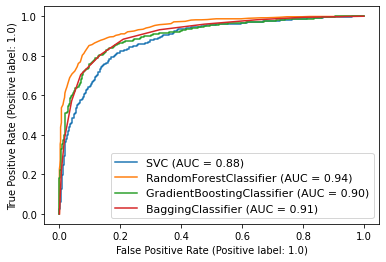

In [107]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp=plot_roc_curve(svc, x_test, y_test)   # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)

plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()


In [108]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

In [109]:
params={'C':[1,0.5,1.5],
       'kernel' : ['linear', 'poly', 'rbf'],
        'gamma' : ['scale', 'auto'],
        'random_state':[100,200,150,250]}
GCV=GridSearchCV(SVC(),params,cv=3)

In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 0.5, 1.5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': [100, 200, 150, 250]})

In [111]:
GCV.best_params_

{'C': 1.5, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 100}

In [113]:
FinalModel = SVC(C= 1.5, gamma='auto', kernel= 'rbf', random_state=100)
FinalModel.fit(x_train, y_train)
pred = FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

81.83581124757595


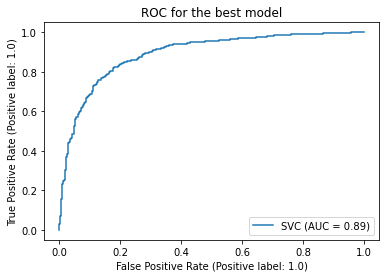

In [114]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(FinalModel, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

In [115]:
# Saving the model using .pkl
import joblib
joblib.dump(FinalModel,"RainClassification.pkl")

['RainClassification.pkl']

In [116]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("RainClassification.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 1., ..., 0., 1., 1.])

In [117]:
a=np.array(y_test)
Class_Result=pd.DataFrame({'Original':a,'Prediction':prediction})
Class_Result

,Original,Prediction
0,1.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,1.0,1.0
...,...,...
1542,0.0,0.0
1543,1.0,0.0
1544,1.0,0.0
1545,1.0,1.0


In [119]:
x = newdf.drop("Rainfall", axis=1)
y = newdf["Rainfall"]

In [120]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.311865,-0.032226,-0.279439,-0.466315,-0.178691,1.089340,0.671798,0.997734,1.460914,1.029367,...,-1.318023,1.507323,0.333423,-0.308649,-0.237124,-0.585559,-0.588222,-1.684771,1.680367,-1.548537
1,-1.311865,-1.091275,0.087217,-0.207177,1.377129,1.308929,0.671798,-0.574739,1.682555,-1.222782,...,-1.200510,-1.126736,-1.035559,-0.255194,0.190562,-0.585559,-0.588222,-1.570658,1.680367,-1.548537
2,-1.311865,-0.120480,0.187214,0.370647,1.205726,1.528518,0.809267,0.997734,1.682555,0.932716,...,-1.049422,-0.691982,-0.816163,0.421906,0.002381,-0.585559,-0.588222,-1.456544,1.680367,-1.548537
3,-1.311865,-0.773560,0.570537,-0.335967,1.508243,-0.886963,-1.037370,0.099178,-1.642059,0.014300,...,-0.361131,-1.368630,-1.285877,-0.094828,0.566926,-0.585559,-0.588222,-1.342430,1.680367,-1.548537
4,-1.311865,0.691458,1.287183,-0.288847,-0.291380,1.089340,0.456953,-1.697935,-0.090573,-0.606021,...,-1.502686,1.123604,1.583119,-0.148283,1.114365,-0.585559,-0.588222,-1.228317,1.680367,-1.548537


In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.559624,Location
1,11.712187,MinTemp
2,39.284992,MaxTemp
3,4.232934,Evaporation
4,8.492634,Sunshine
5,1.585854,WindGustDir
6,2.974770,WindGustSpeed
7,1.246047,WindDir9am
8,1.549770,WindDir3pm
9,1.899558,WindSpeed9am


In [122]:
#Let us remove Temp3pm
x.drop('Temp3pm',axis=1,inplace=True)

In [123]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.558521,Location
1,11.587598,MinTemp
2,13.356818,MaxTemp
3,4.231932,Evaporation
4,8.476377,Sunshine
5,1.585769,WindGustDir
6,2.948925,WindGustSpeed
7,1.245849,WindDir9am
8,1.547900,WindDir3pm
9,1.883808,WindSpeed9am


In [124]:
x.drop('Temp9am',axis=1,inplace=True)


In [125]:
vif = pd.DataFrame()#Again check the value of VIF
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.533763,Location
1,6.386137,MinTemp
2,9.500844,MaxTemp
3,4.223250,Evaporation
4,8.356201,Sunshine
5,1.585300,WindGustDir
6,2.908516,WindGustSpeed
7,1.244229,WindDir9am
8,1.545938,WindDir3pm
9,1.863647,WindSpeed9am


In [127]:
x.drop('Pressure3pm',axis=1,inplace=True)# Droping Pressure3pm


In [128]:
#Finding best random state
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFG = RandomForestRegressor()
    RFG.fit(x_train, y_train)
    pred = RFG.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7679696021459061  on Random_state  81


In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)     #Creating at best Random State


In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [131]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))
# Checking cv score 
print(cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.7710267320150147
MAE: 0.24298946721794307
MSE: 0.15650592843877298
RMSE: 0.39560830178191786
0.3577418110896995


In [132]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))
# Checking cv score 
print(cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.6090807613621032
MAE: 0.29506258027525983
MSE: 0.2671979088476572
RMSE: 0.5169118966010138
0.3002426141926057


In [133]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))
# Checking cv score 

print(cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7341802526226133
MAE: 0.272005989721926
MSE: 0.18169093155182645
RMSE: 0.42625219243052165
0.3222177433562733


In [134]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))
# Checking cv score
print(cross_val_score(BR,x,y,cv=5).mean())

R2_Score: 0.7385773295817648
MAE: 0.2566030501072498
MSE: 0.1786854776053253
RMSE: 0.42271205046145216
0.30331348734570884


In [135]:
ABR=AdaBoostRegressor()

ABR.fit(x_train,y_train)
# prediction
predABR=ABR.predict(x_test)
print('R2_Score:',r2_score(y_test,predABR))
print('MAE:',mean_absolute_error(y_test, predABR))
print('MSE:',mean_squared_error(y_test, predABR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predABR)))
# Checking cv score
print(cross_val_score(ABR,x,y,cv=5).mean())

R2_Score: 0.5449479469312777
MAE: 0.45997620880426
MSE: 0.3110334436863619
RMSE: 0.5577037239308716
0.17498073793739563


In [136]:
parameter={'n_estimators':[1,3,4,5],
          'learning_rate':[.1,1,.3,.5],
          'loss' : ['linear', 'square', 'exponential'],
          'random_state':[100,150,200,250]}

In [137]:
GCV=GridSearchCV(AdaBoostRegressor(),parameter,cv=4)


In [138]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=4, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 1, 0.3, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [1, 3, 4, 5],
                         'random_state': [100, 150, 200, 250]})

In [139]:
GCV.best_params_


{'learning_rate': 0.5,
 'loss': 'linear',
 'n_estimators': 5,
 'random_state': 100}

In [146]:
Rainfall_model = AdaBoostRegressor(learning_rate= 0.5, loss= 'linear',n_estimators= 5,random_state=100)
Rainfall_model.fit(x_train, y_train)
pred = Rainfall_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.4778696688792775
R2_Score: 66.59027342049413


In [147]:
# Saving the model using .pkl
import joblib
joblib.dump(Rainfall_model,"RainfallRegressor.pkl")

['RainfallRegressor.pkl']

In [148]:
# Loading the saved model
model=joblib.load("RainfallRegressor.pkl")

#Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,-0.791578,-0.585180
1,-0.791578,-0.546498
2,-0.791578,-0.657036
3,-0.791578,-0.585180
4,-0.791578,0.127277
...,...,...
1036,0.659912,0.077353
1037,-0.791578,-0.585180
1038,-0.791578,0.077353
1039,-0.791578,-0.373959


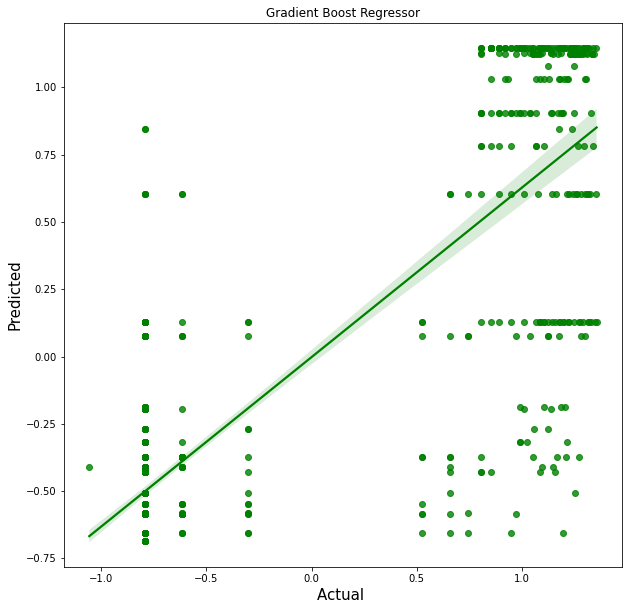

In [149]:
plt.figure(figsize=(10,10))
sns.regplot(y_test,prediction,color='g')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Regressor")
plt.show()
